In [2]:
USE my_keyspace;

## Counter

In [3]:
// Create a table for the counter column

CREATE TABLE popular_count (
  id UUID PRIMARY KEY,
  popularity counter
  );

In [5]:
// Loading data into a counter column is different than other tables. The data is updated rather than inserted.
UPDATE popular_count
 SET popularity = popularity + 1
 WHERE id = 6ab09bec-e68e-48d9-a5f8-97e6fb4c9b47;


In [7]:
// Take a look at the counter value and note that popularity has a value of 1.
SELECT * FROM popular_count;

// Additional increments or decrements will change the value of the counter column.

                                                                                                                                                                                                                                                                                                                                                                                                      
 id                                   | popularity
--------------------------------------+------------
 6ab09bec-e68e-48d9-a5f8-97e6fb4c9b47 |          1

(1 rows)

In [8]:
Create table View_Counts 
 (
  count_view counter,
  name varchar,
  blog_name text,
  primary key(name, blog_name)
 ); 

In [9]:
// Let’s see the table schema.

describe table View_Counts; 

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
CREATE TABLE my_keyspace.view_counts (
    name text,
    blog_name text,
    count_view counter,
    PRIMARY KEY (name, blog_name)
) WITH CLUSTERING ORDER BY (blog_name ASC)
    AND additional_write_policy = '99p'
    AND bloom_filter_fp_chance = 0.01
    AND caching = {'keys': 'ALL', 'rows_per_partition': 'NONE'}
    AND comment = ''
    AND compaction = {'class': 'org.apache.cassandra.db.compaction.SizeTieredCompactionStrategy', 'max_thr

In [10]:
// Now, we are going to insert value for the counter column with the help of the Update clause.
// Let’s have a look.

update View_counts set count_view = count_view+1 
where name = 'Ashish'and blog_name =  'cassandra';  

In [11]:
// Let’s see the result.

select * 
from View_Counts; 

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [12]:
// Now, we are going to update the value for the counter column with the help of the Update clause.
// Let’s have a look.

update View_counts set count_view = count_view + 4 
where name = 'Ashish'and blog_name =  'cassandra'; 


In [13]:
// Let’s see the result.

select * 
from View_Counts; 

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [14]:
// We can also decrement the value for the counter column with the help of the Update clause. let’s have a look.

update View_counts set count_view = count_view - 4 
where name = 'Ashish'and blog_name =  'cassandra'; 



In [15]:
//Let’s see the result.

select * 
from View_Counts; 

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [16]:
// Cassandra rejects using time star or using TTL in the command to update a counter column. So, let’s create a View_Counts table. So, we created count_view and this is a counter value of type counter. This is very important and we have a name and blog_name and we can see that the primary key is to have a name and blog_name.

// If we will try to create a similar table, let’s say – copy_View_Counts and the primary key will be the only name, we’ll get an error. Because cannot mix counter and non-counter columns in the same table if they are not primary key. let’s have a look.

//Let’s understand with an example.

Create table copy_View_Counts
 (
  count_view counter,
  name varchar,
  blog_name text,
  primary key(name)
 ); 


                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [17]:
// Here, All non-counter columns must be part of the primary key. but, the only name is the only part of primary column that’s why it is giving an error. let’s have a look.

// Let’s see the result.

select * 
from View_Counts; 

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

## UUID and Timeuuid functions in Cassandra

- One of the reason of using uuid() function to generate Unique ID which helps in avoiding collisions
- The uuid() function is suitable for use in insert or update statements and uuid() function takes no parameter value to generate a unique random Type 4 UUID value which is guaranteed unique value
- Let’s take an example to understand the uuid() function

The uuid() function takes no parameters and generates a random Type 4 UUID suitable for use in INSERT or UPDATE statements.

- Several timeuuid() functions are designed for use with the timeuuid() type:

- dateOf()
    - Used in a SELECT clause, this function extracts the timestamp of a timeuuid column in a result set. This function returns the extracted timestamp as a date. Use unixTimestampOf() to get a raw timestamp.

- now()
    - In the coordinator node, generates a new unique timeuuid in milliseconds when the statement is executed. The timestamp portion of the timeuuid conforms to the UTC (Universal Time) standard. This method is useful for inserting values. The value returned by now() is guaranteed to be unique.

- minTimeuuid() and maxTimeuuid()
    - Returns a UUID-like result given a conditional time component as an argument. 

In [19]:
Create table function4(Id uuid primary key, name text); 


In [20]:
// This CQL query is NOT correct to insert Id value using uuid() function. 
 

Insert into function4 (Id, name) 
values (1, 'Ashish'); // fails  

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [21]:
//This CQL query is correct to insert Id value using uuid() function. 

Insert into function4(Id, name) 
values (now(), 'Ashish');  //correct 

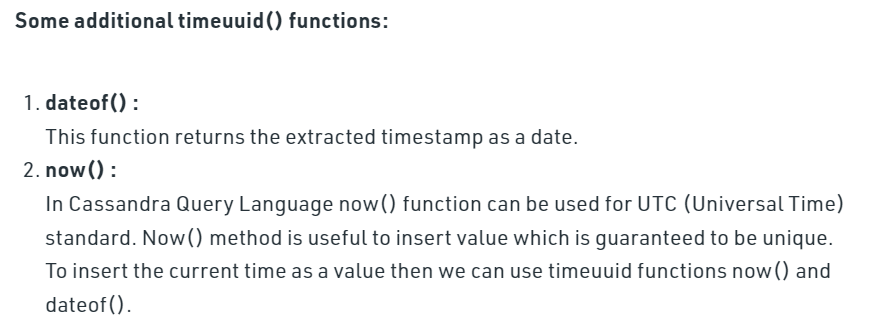

In [22]:
CREATE TABLE function_test1(Id uuid primary key,
                                        name text,
                           modified_date timestamp );

In [23]:
INSERT INTO function_test1(Id, name, modified_date) 
       VALUES (now(), 'Rana', '2019-10-29 00:05+0000');

In [24]:
INSERT INTO function_test1(Id, name, modified_date) 
       VALUES (now(), 'Rana', '2019-10-30 00:05+0000');

In [25]:
select * 
from function_test1; 

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [26]:
CREATE TABLE sample_times (a int, b timestamp, c timeuuid, d bigint, PRIMARY KEY (a,b,c,d));

In [27]:
INSERT INTO sample_times (a,b,c,d) VALUES (1, toUnixTimestamp(now()), 50554d6e-29bb-11e5-b345-feff819cdc9f, toTimestamp(now()));

In [28]:
SELECT toDate(c) FROM sample_times;

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

- toDate(timeuuid)
    - Converts timeuuid to date in YYYY-MM-DD format.

- toTimestamp(timeuuid)
    - Converts timeuuid to timestamp format.

- toUnixTimestamp(timeuuid)
    - Converts timeuuid to UNIX timestamp format.

- toDate(timestamp)
    - Converts timestamp to date in YYYY-MM-DD format.

- toUnixTimestamp(timestamp)
    - Converts timestamp to UNIX timestamp format.

- toTimestamp(date)
    - Converts date to timestamp format.

- toUnixTimestamp(date)
    - Converts date to UNIX timestamp format.